<a href="https://colab.research.google.com/github/joaoholandaa/ps4-games/blob/main/ps4_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise do mercado de vendas de jogos para PS4** <br>
Conjunto de dados extraídos do VzCharts disponível no Kaggle (utilizar o arquivo "PS4_GamesSales.csv"): https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset?resource=download

In [27]:
# Libs para modelagem e matrizes
import numpy as np
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [28]:
# Lendo dados
base_dados = pd.read_csv('/content/drive/MyDrive/ciencia-de-dados/ps4-games/PS4_GamesSales.csv', encoding='latin-1')

# Verificando
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [29]:
# Dimensão
base_dados.shape

(1034, 9)

In [30]:
# Nulos
base_dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

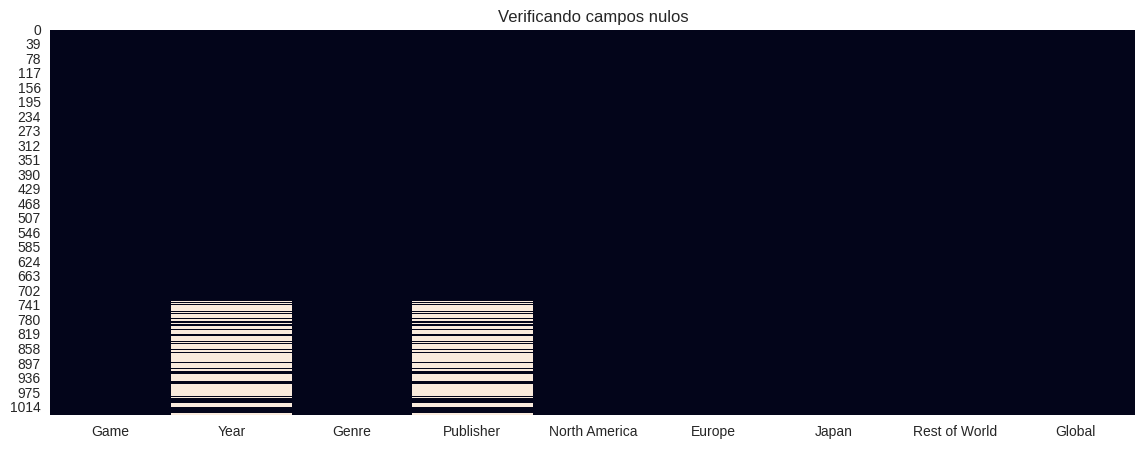

In [31]:
# Nulos-Gráfico
plt.figure(figsize=(14, 5))
plt.title('Verificando campos nulos')
sns.heatmap(base_dados.isnull(), cbar=False);

In [32]:
# Retirando valores nulos
base_dados.dropna(inplace=True)

In [33]:
# Estatística
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


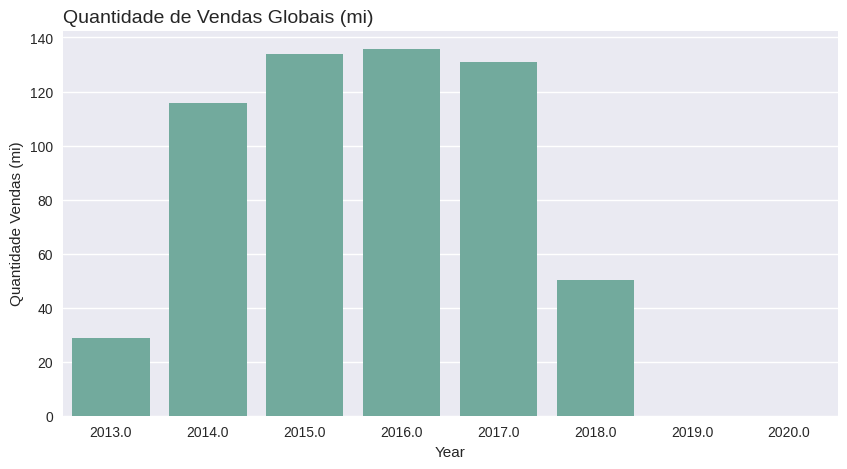

In [34]:
# Tamanho da imagem
plt.figure(figsize=(10,5))

# Título
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14)

# Gráfico
sns.barplot(data=base_dados, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum)

# Label
plt.ylabel('Quantidade Vendas (mi)');

In [35]:
# Retirar anos
base_dados = base_dados.loc[(base_dados['Year'] != 2019) & (base_dados['Year'] != 2020)]

# Verificar
base_dados.loc[(base_dados['Year'] != 2019) & (base_dados['Year'] != 2020)]['Year'].unique()

array([2014., 2015., 2018., 2017., 2016., 2013.])

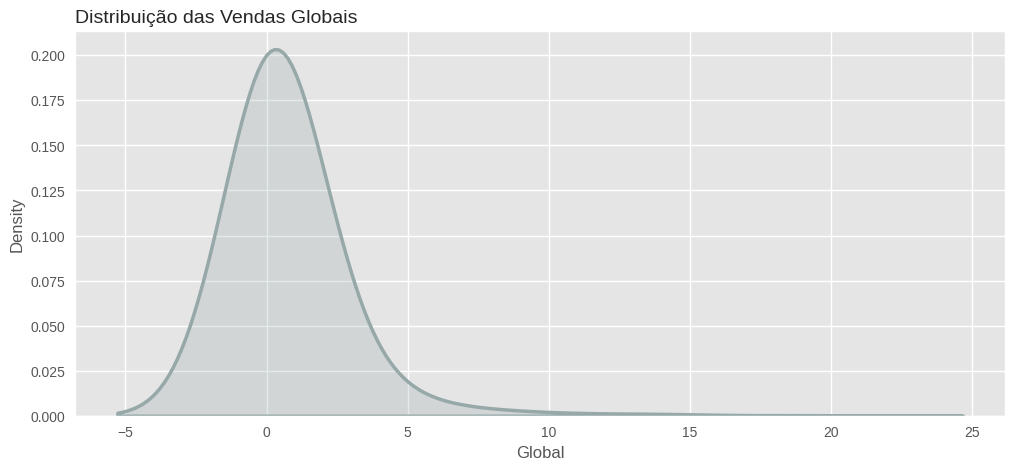

In [36]:
# Tamanho
plt.figure(figsize=(12,5))

# Estilo
plt.style.use('ggplot')

# Título
plt.title('Distribuição das Vendas Globais', loc='left', fontsize=14)

# Plot
sns.kdeplot(base_dados['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5);

In [37]:
base_dados.groupby(by=['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


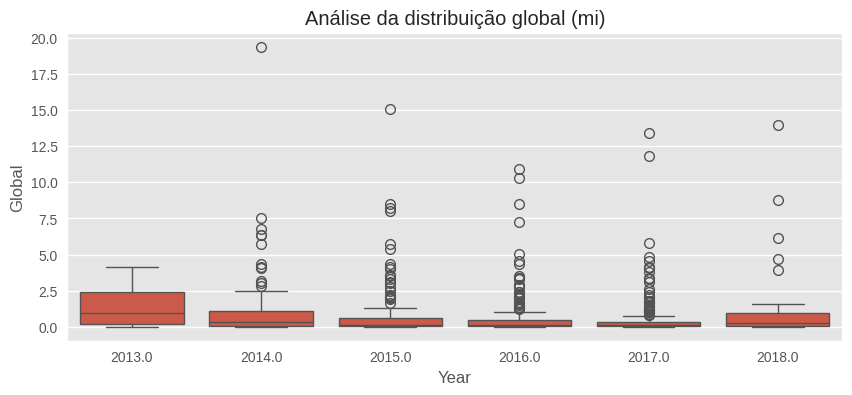

In [38]:
# Tamanho
plt.figure(figsize=(10, 4))

# Titulo
plt.title('Análise da distribuição global (mi)')

# Plot
sns.boxplot(data=base_dados, x='Year', y='Global');

In [39]:
base_dados.loc[base_dados['Global'] >= 10 ]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [40]:
analise = base_dados.groupby( by=['Year'] ).sum().reset_index()

# analisando a proporção dos 100% de cada continente comparado ao total
america = [america / total * 100 for america, total in zip(analise['North America'], analise['Global'])]
europa = [europa / total * 100 for europa, total in zip(analise['Europe'], analise['Global'])]
japao = [japao / total * 100 for japao, total in zip(analise['Japan'], analise['Global'])]
mundo = [mundo / total * 100 for mundo, total in zip(analise['Rest of World'], analise['Global'])]

america, europa, japao, mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

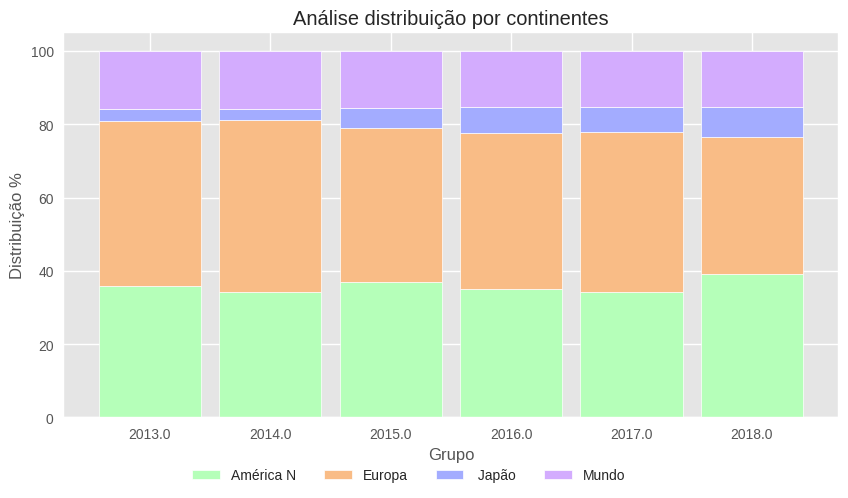

In [41]:
# Tamanho
plt.figure( figsize=(10, 5) )

# LArgura barra no gráfico
largura_barra = 0.85
rotulos = analise['Year']
grupos = [0, 1, 2, 3, 4, 5]

# Título
plt.title('Análise distribuição por continentes')

# Plot da America
plt.bar(grupos, america, width=largura_barra, color='#b5ffb9', edgecolor='white')

# Plot da Europa
plt.bar(grupos, europa, bottom=america, width=largura_barra, color='#f9bc86', edgecolor='white')

# Plot do Japao
plt.bar(grupos, japao, bottom=[A + B for A, B in zip(america, europa)], width=largura_barra, color='#a3acff', edgecolor='white' )

# Plot do Resto do mundo
plt.bar(grupos, mundo, bottom=[A + B + C for A, B, C in zip(america, europa, japao)], width=largura_barra, color='#d3acfe', edgecolor='white')

# Labels
plt.xticks(grupos, rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Legenda
plt.legend( ['América N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );

In [42]:
base_dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [43]:
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

base_dados['Produtor'] = Funcao_Label.fit_transform(base_dados['Publisher'])
base_dados['Genero'] = Funcao_Label.fit_transform(base_dados['Genre'])
base_dados['Jogo'] = Funcao_Label.fit_transform(base_dados['Game'])

base_dados

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,121,0,72
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,121,8,802
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00,34,2,107
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00,17,0,114


In [44]:
paleta_cores = sns.color_palette('husl', 8)
paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

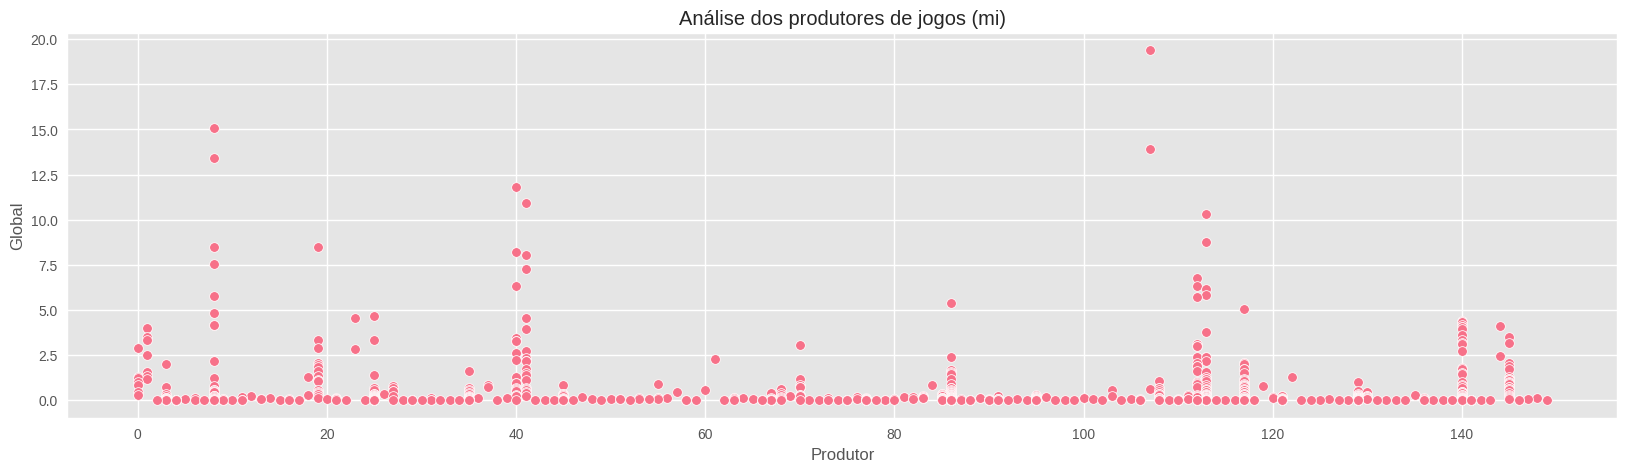

In [45]:
plt.figure( figsize=(20,5))
plt.title('Análise dos produtores de jogos (mi)')
sns.scatterplot(data=base_dados, x='Produtor', y='Global', color=paleta_cores[0]);

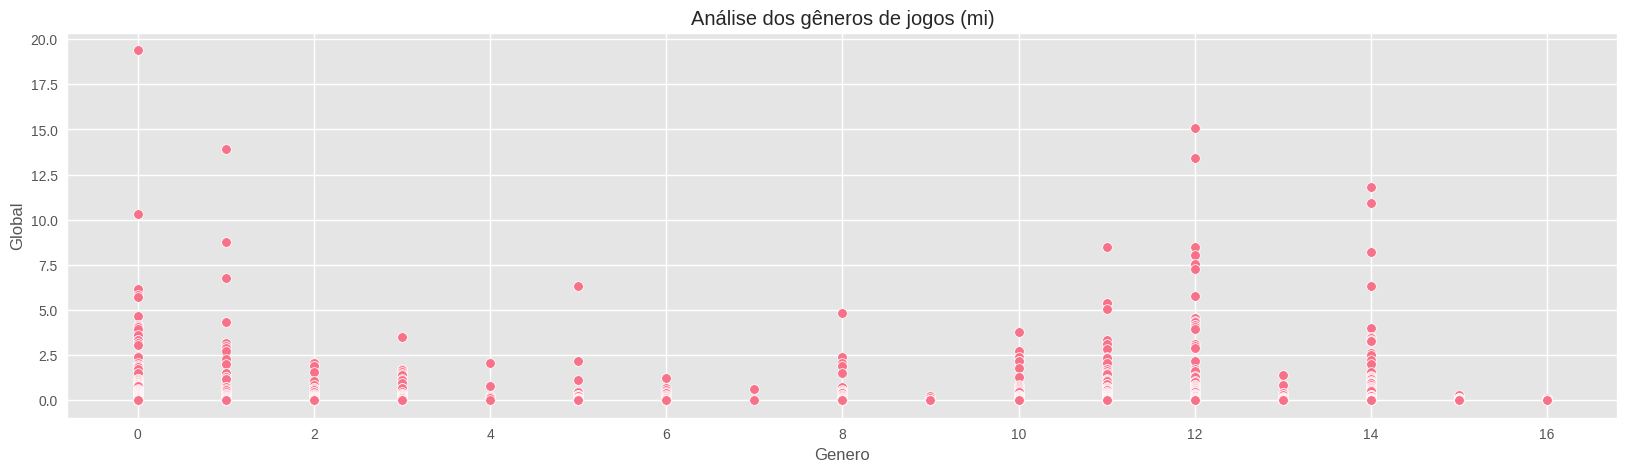

In [46]:
plt.figure( figsize=(20,5))
plt.title('Análise dos gêneros de jogos (mi)')
sns.scatterplot(data=base_dados, x='Genero', y='Global', color=paleta_cores[0]);

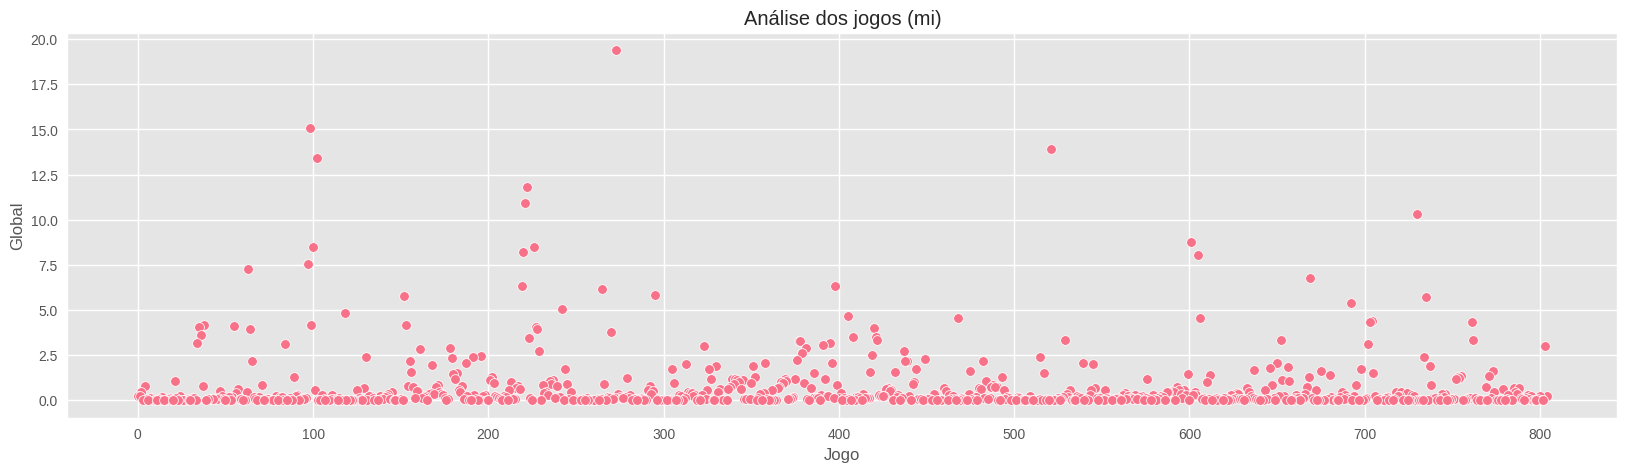

In [47]:
plt.figure( figsize=(20,5))
plt.title('Análise dos jogos (mi)')
sns.scatterplot(data=base_dados, x='Jogo', y='Global', color=paleta_cores[0]);

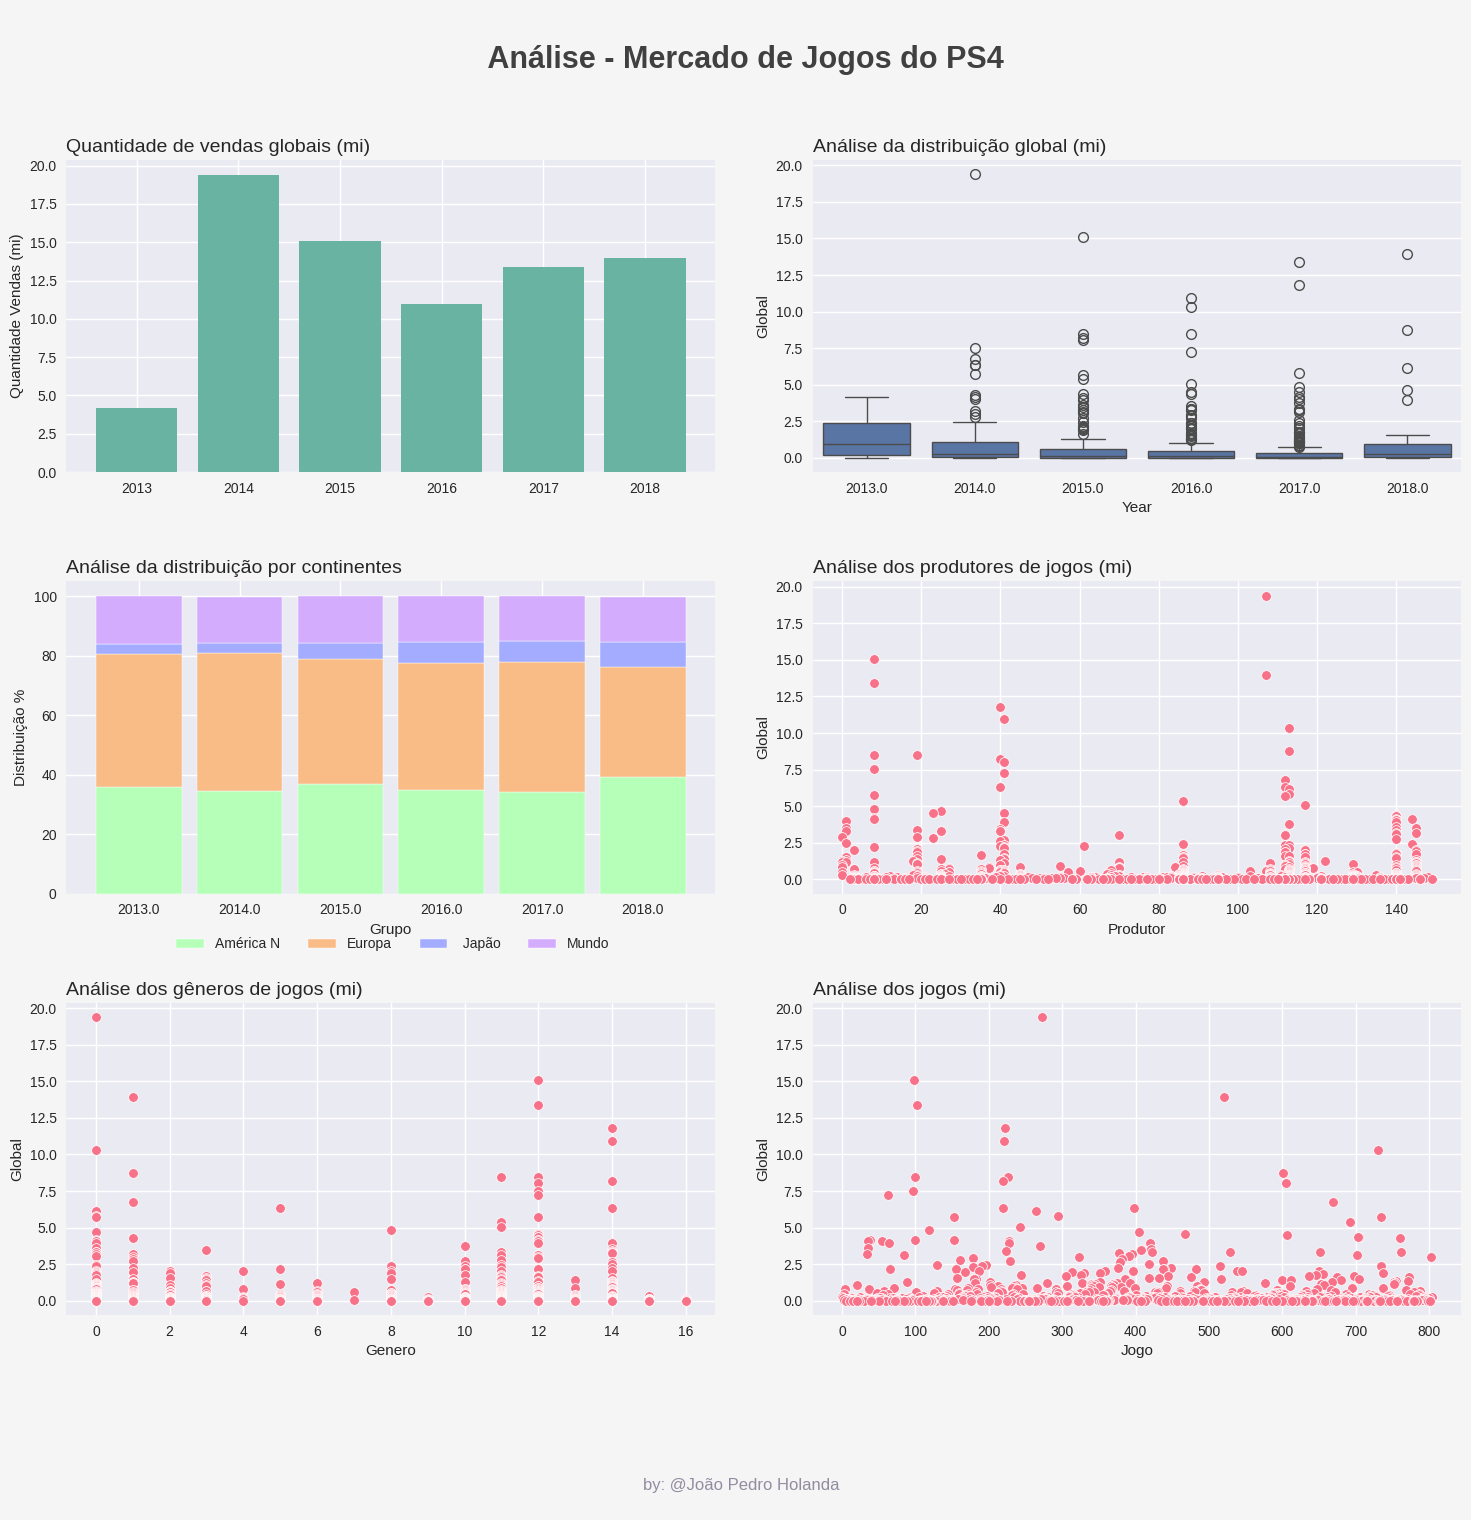

In [48]:
# Relatório --> Report para o time

# Tamanho da Imagem
fig, ax = plt.subplots( figsize=(18, 15) )

# Cor de fundo
cor_fundo = '#f5f5f5'
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)

# Estilo dos gráficos
plt.style.use('seaborn')

# Título da figura
plt.suptitle('\n Análise - Mercado de Jogos do PS4', fontsize=22, color='#404040', fontweight=600 )

# Parâmetros para o grid
linhas = 3
colunas = 2

# Acessando gráfico 1
plt.subplot(linhas, colunas, 1)
# Título
plt.title('Quantidade de vendas globais (mi)', loc='left', fontsize=14)
# Gráfico
plt.bar(base_dados['Year'], base_dados['Global'], color='#69b3a2' )
# Label
plt.ylabel('Quantidade Vendas (mi)')


# Acessando gráfico 2
plt.subplot(linhas, colunas, 2)
# Título
plt.title('Análise da distribuição global (mi)', loc='left', fontsize=14)
# Plot
sns.boxplot(data=base_dados, x='Year', y='Global')


# Acessando gráfico 3
plt.subplot(linhas, colunas, 3)
# Largura barra no gráfico
largura_barra = 0.85
rotulos = analise['Year']
grupos = [0, 1, 2, 3, 4, 5]
# Título
plt.title('Análise da distribuição por continentes', loc='left', fontsize=14)
# Plot da América
plt.bar(grupos, america, width=largura_barra, color='#b5ffb9', edgecolor='white')
# Plot da Europa
plt.bar(grupos, europa, bottom=america, width=largura_barra, color='#f9bc86', edgecolor='white')
# Plot do Japão
plt.bar(grupos, japao, bottom=[ A + B for A, B in zip(america, europa)], width=largura_barra, color='#a3acff', edgecolor='white')
# Plot do resto do mundo
plt.bar(grupos, mundo, bottom=[ A + B + C for A, B, C in zip(america, europa, japao) ], width=largura_barra, color='#d3acfe', edgecolor='white')
# Labels
plt.xticks(grupos, rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')
# Legenda
plt.legend( ['América N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4);


# Acessando gráfico 4
plt.subplot(linhas, colunas, 4)
plt.title('Análise dos produtores de jogos (mi)', loc='left', fontsize=14)
sns.scatterplot(data=base_dados, x='Produtor', y='Global', color=paleta_cores[0]);


# Acessando gráfico 5
plt.subplot(linhas, colunas, 5)
plt.title('Análise dos gêneros de jogos (mi)', loc='left', fontsize=14)
sns.scatterplot(data=base_dados, x='Genero', y='Global', color=paleta_cores[0]);


# Acessando gráfico 6
plt.subplot(linhas, colunas, 6)
plt.title('Análise dos jogos (mi)', loc='left', fontsize=14)
sns.scatterplot(data=base_dados, x='Jogo', y='Global', color=paleta_cores[0]);


# Ajustar o layout
plt.subplots_adjust(hspace=0.35, wspace=0.15)

# Rodapé
Rodape = '''
by: @João Pedro Holanda
'''

# Incluindo o rodape no relatorio
fig.text( 0.5, -0.02, Rodape, ha='center', va='bottom', size=12, color='#938ca1');